<a href="https://colab.research.google.com/github/AndyRevilla/datamuestra/blob/main/Ventas_shoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/shoes.csv")
df

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,SalePrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,$159.00,0%,$159.00
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,$199.00,20%,$159.20
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,$149.00,20%,$119.20
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,$159.00,0%,$159.00
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,$159.00,0%,$159.00
...,...,...,...,...,...,...,...,...,...,...,...,...
14962,65773,12/31/2016,United Kingdom,2154,UK2,Male,9.5,42-43,9.0,$139.00,0%,$139.00
14963,65774,12/31/2016,United States,2181,US12,Female,12.0,42-43,10.0,$149.00,0%,$149.00
14964,65775,12/31/2016,Canada,2203,CAN6,Male,10.5,43-44,10.0,$179.00,30%,$125.30
14965,65776,12/31/2016,Germany,2231,GER1,Female,9.5,40,7.5,$199.00,0%,$199.00


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

In [ ]:
df['SalePrice'] = df['SalePrice'].apply(lambda x: float(x[2:]))
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: float(x[2:]))

In [ ]:
categorical_variables = ['Country', 'Gender', 'Size (US)', 'Discount', 'Year', 'Month']
numerical_variables = ['UnitPrice', 'SalePrice']

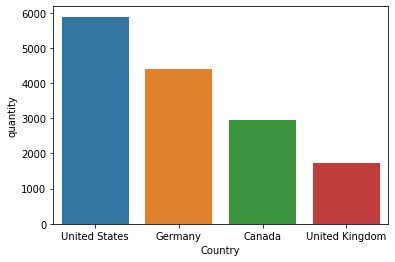

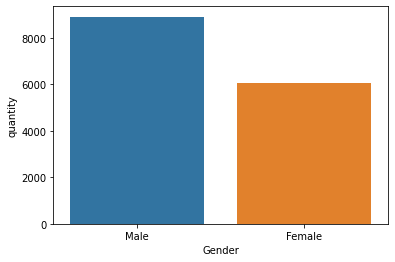

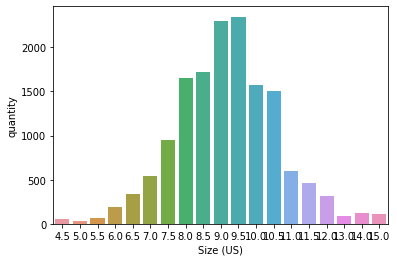

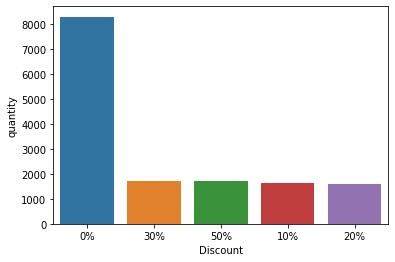

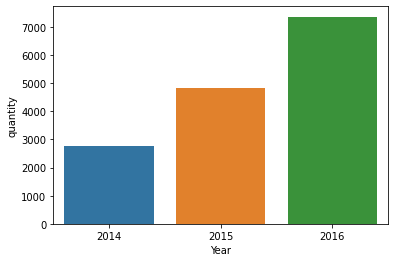

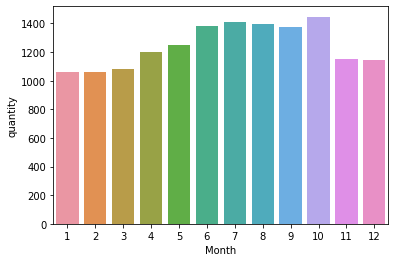

In [ ]:
for cat_variable in categorical_variables:
    frequency = df[cat_variable].value_counts()
    df_frequency = pd.DataFrame({cat_variable: frequency.index.tolist(), 'quantity': frequency.tolist()})
    sns.barplot(x=cat_variable, y='quantity', data=df_frequency)
    plt.show()

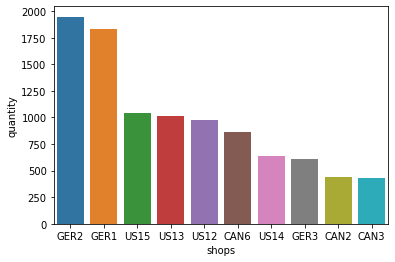

In [ ]:
frequency_shops = df['Shop'].value_counts().head(10)
df_frequency_shops = pd.DataFrame({'shops': frequency_shops.index.tolist(), 'quantity': frequency_shops.tolist()})
sns.barplot(x='shops', y='quantity', data=df_frequency_shops)
plt.show()

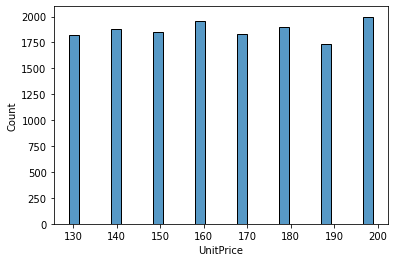

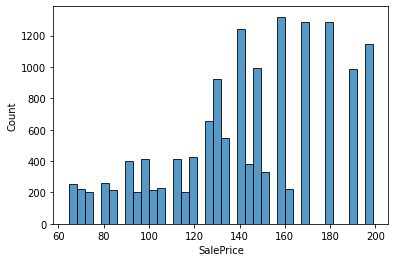

In [ ]:
for num_variable in numerical_variables:
    sns.histplot(df[num_variable], bins='auto')
    plt.show()

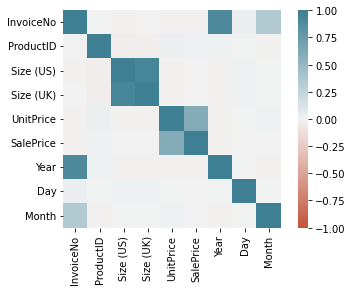

In [ ]:
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
plt.show()

In [ ]:
grouped = df[(df['Year'] != 2014) & (df['Gender'] == 'Male')
             & (df['Country'] == 'United States')].groupby(
             ['Size (US)', 'Year', 'Month']).size()\
             .unstack(level=0).fillna(value=0)

In [ ]:
means = []
standard_errors = []
for column in grouped.columns:
    means.append(grouped[column].mean())
    standard_errors.append(grouped[column].sem())

d = {'means': means, 'std_error': standard_errors}
df_calculations = pd.DataFrame(data=d, index=grouped.columns)

In [ ]:
df_calculations['error_margin'] = df_calculations['std_error'].apply(lambda x: x * 2.07)
df_calculations['low_margin'] = df_calculations.apply(lambda x: x['means'] - x['error_margin'], axis=1)
df_calculations['up_margin'] = df_calculations.apply(lambda x: x['means'] + x['error_margin'], axis=1)
df_calculations['math_round_up'] = df_calculations.apply(lambda x: math.ceil(x['up_margin']), axis=1)
df_calculations

,means,std_error,error_margin,low_margin,up_margin,math_round_up
Size (US),,,,,,
6.0,2.166667,0.393179,0.813880,1.352787,2.980546,3
6.5,1.583333,0.340059,0.703922,0.879411,2.287255,3
7.0,1.333333,0.338725,0.701160,0.632174,2.034493,3
7.5,2.333333,0.411196,0.851176,1.482158,3.184509,4
8.0,4.791667,0.598849,1.239618,3.552049,6.031284,7
8.5,7.875000,0.944689,1.955505,5.919495,9.830505,10
9.0,16.333333,1.262139,2.612628,13.720705,18.945961,19
9.5,25.583333,1.766144,3.655917,21.927416,29.239251,30
10.0,18.791667,1.325583,2.743957,16.047709,21.535624,22


In [ ]:
df_calculations.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 16 entries, 6.0 to 15.0
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   means          16 non-null     float64
 1   std_error      16 non-null     float64
 2   error_margin   16 non-null     float64
 3   low_margin     16 non-null     float64
 4   up_margin      16 non-null     float64
 5   math_round_up  16 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.4 KB


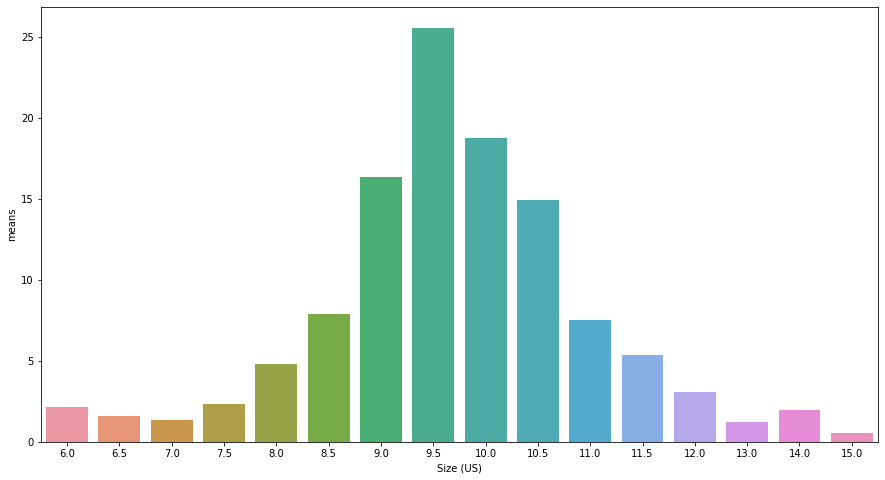

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x = df_calculations.index , y = 'means', data = df_calculations, ci = None)
plt.show()